# Neuroscience, Learning, Memory, Cognition Course
## Sharif University of Technology


In [1]:
#@title Enter your information & "RUN the cell!!"

student_id =  99104781 #@param {type:"integer"}
student_name = "Mohammad Hossein Shafizadegan" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99104781
your name: Mohammad Hossein Shafizadegan


##Exercise Outline : 
This exercise consist of two parts: in part (I) we would practice our python skills and in part (II) we would get familiar with some neuron models which may hear before in the course. You have to complete and deliver this .ipynb file and a report describing your result. Grades will be given based on your report and your code.

#** PART I: PYTHON PRACTICE**

In [2]:
from pylab import *

In [3]:
a = array([[1, 2, 3, 4]])
b = array( [[0, 4, 7, 6]] )

In [4]:
print(a)

[[1 2 3 4]]


**Q.**

Search about pylab package and describe it shortly?

Multiply two defined arrays `a` and `b` using operator `*` and multiply(a,b). 
What operation does `multiply()` perform?

To see a list of the variables you've defined, type `who` or `whos` in a code block by themselves. Notice `whos` provides more information.

*`5 Points`* 


In [5]:
who()

Name            Shape            Bytes            Type

a               1 x 4            16               int32
b               1 x 4            16               int32

Upper bound on total bytes  =       32


In [6]:
c = a * b
d = multiply(a, b)

print("a * b = ", c)
print("using multiply function : ", d)

a * b =  [[ 0  8 21 24]]
using multiply function :  [[ 0  8 21 24]]


It can be seen that the `multiply()` function, calculates the product of each same elements of arrays, and it's an elementwise multiplication.

**2) Defining a new function.**

Sometimes we'll need to write our own Python functions.  Let's do that now.

Our function will do something very simple: it will take as input a
vector and return as output the vector elements squared plus an additive
constant.

If we have a vector, `v`, and a constant, `b`, we would like to call:

    vsq = my_square_function(v, b)
    
This won't work!  We first need to define `my_square_function`. Let's do so now,
please complete the function below:

*`5 Points`*


In [7]:
def my_square_function(x, c):
    """Square a vector and add a constant.

    Arguments:
    x -- vector to square
    c -- constant to add to the square of x
    """

    result = x * x + c
    
    return result

The function begins with the keyword `def` followed by the function name and the inputs in parentheses. Notice that this first line ends with a colon `:`. All the function components that follow this first line should be **indented one level**. This is just like the `for` loop we applied earlier; the operations performed by the for loop were indented one leve.

<div class="python-note">
    
When defining the function, the code the function executes should be indented one level.

</div>

The text inside triple quotes provides an optional documentation string that describes our function. While optional, including a '*doc string*' is an important part of making your code understandable and reusable.

The keyword `return` exits the function, and in this case returns the expression `x * x + c`. Note that a return statement with no arguments returns `None`, indicating the absence of a value.

With the function defined, let's now call it. To do so we first define the inputs, and then run the function, as follows:

In [8]:
arr = array([[4, 5, 2, 9]])
c = 3
arr2 = my_square_function(arr, c)

print("The input array : ", arr)
print("Constant added to squared array : ", c)
print("result = ", arr2)

The input array :  [[4 5 2 9]]
Constant added to squared array :  3
result =  [[19 28  7 84]]


To see the doc string that describes our function, type `my_square_function?`

In [9]:
# Let's check that our docstring works
my_square_function?

**3) Loading matlab data (.mat) and plot power spectrum**


We consider data recorded in the scalp electroencephalogram or EEG. The EEG provides a measure of brain voltage activity with high temporal resolution (typically on the order of milliseconds) but poor spatial resolution (on the order of 10 cm2 of cortex). Here we will consider EEG activity recorded from a 
single scalp electrode. We will analyze these data to determine what (if any) rhythmic activity is present. In doing so, we will learn about an important technique to characterize rhythms in data - the Fourier transform and power spectral density or “spectrum”. please fill in the code below and plot the power spectral density.

The EEG data is available [here](https://drive.google.com/file/d/1RGvi6Tr8qhLPfBwo0A-kCKedFDqdPxYv/view?usp=sharing).

*`5 Points`*



In [10]:
##################################
# add all necessary packages here
##################################

from scipy.io import loadmat                    
from pylab import *                            
from numpy.fft import fft
rcParams['figure.figsize']=(12,3)

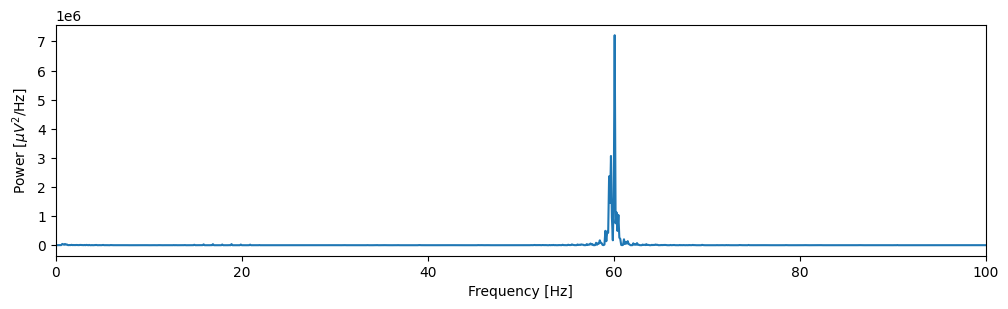

In [11]:
data = loadmat("EEG-1.mat")  # Load the EEG data
EEG = data['EEG'].reshape(-1)         # Extract the EEG variable
t = data['t'][0]                      # ... and the t variable

x = EEG                               # Relabel the data variable
dt = t[1] - t[0]                      # Define the sampling interval
N = x.shape[0]                        # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x)                           # Compute Fourier transform of x
Sxx = abs(xf)**2                      # Compute spectrum
end = int(ceil(N/2)+1)
Sxx = Sxx[1:end]                      # Ignore negative frequencies

df = 1 / T.max()                      # Determine frequency resolution
fNQ = 1 / dt / 2                      # Determine Nyquist frequency
faxis = arange(0,fNQ,df)              # Construct frequency axis

plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
xlim([0, 100])                        # Select frequency range
xlabel('Frequency [Hz]')              # Label the axes
ylabel('Power [$\mu V^2$/Hz]')
show()

your result should be like below: 

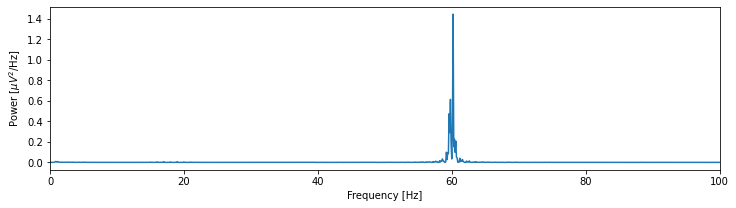

#** PART II: NEURON MODELS**

## Import necessary packages 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

##################################
# add all necessary packages here
##################################


---
#The Leaky Integrate-and-Fire (LIF) model

This video introduces the reduction of a biological neuron to a simple leaky-integrate-fire (LIF) neuron model.

Now, it's your turn to implement one of the simplest mathematical model of a neuron: the leaky integrate-and-fire (LIF) model. The basic idea of LIF neuron was proposed in 1907 by Louis Édouard Lapicque, long before we understood the electrophysiology of a neuron (see a translation of [Lapicque's paper](https://pubmed.ncbi.nlm.nih.gov/17968583/) ). More details of the model can be found in the book [**Theoretical neuroscience**](http://www.gatsby.ucl.ac.uk/~dayan/book/) by Peter Dayan and Laurence F. Abbott.

The subthreshold membrane potential dynamics of a LIF neuron is described by

\begin{eqnarray}
C_m\frac{dV}{dt} = -g_L(V-E_L) + I,\quad (1)
\end{eqnarray}

where $C_m$ is the membrane capacitance, $V$ is the membrane potential, $g_L$ is the leak conductance ($g_L = 1/R$, the inverse of the leak resistance $R$), $E_L$ is the resting potential, and $I$ is the external input current. 

Dividing both sides of the above equation by $g_L$ gives

\begin{align}
\tau_m\frac{dV}{dt} = -(V-E_L) + \frac{I}{g_L}\,,\quad (2)
\end{align}

where the $\tau_m$ is membrane time constant and is defined as $\tau_m=C_m/g_L$. 

Note that dividing capacitance by conductance gives units of time! 

Below, we will use Eqn.(2) to simulate LIF neuron dynamics. 

If $I$ is sufficiently strong such that $V$ reaches a certain threshold value $V_{\rm th}$, $V$ is reset to a reset potential $V_{\rm reset}< V_{\rm th}$, and voltage is clamped to $V_{\rm reset}$ for $\tau_{\rm ref}$ ms, mimicking the refractoriness of the neuron during an action potential:

\begin{eqnarray}
\mathrm{if}\quad V(t_{\text{sp}})\geq V_{\rm th}&:& V(t)=V_{\rm reset} \text{  for } t\in(t_{\text{sp}}, t_{\text{sp}} + \tau_{\text{ref}}]
\end{eqnarray}
where $t_{\rm sp}$ is the spike time when $V(t)$ just exceeded $V_{\rm th}$.

</details>


The LIF model captures the facts that a neuron:
- performs spatial and temporal integration of synaptic inputs
- generates a spike when the voltage reaches a certain threshold
- goes refractory during the action potential
- has a leaky membrane

The LIF model assumes that the spatial and temporal integration of inputs is linear. Also, membrane potential dynamics close to the spike threshold are much slower in LIF neurons than in real neurons.

## Coding Exercise 1: Python code to simulate the LIF neuron

We now write Python code to calculate our equation for the LIF neuron and simulate the LIF neuron dynamics. We will use the Euler method, to numerically integrate this equation:

\begin{equation}
\tau_m\frac{dV}{dt} = -(V-E_L) + \frac{I}{g_L}\,
\end{equation}

where $V$ is the membrane potential, $g_L$ is the leak conductance, $E_L$ is the resting potential, $I$ is the external input current, and $\tau_m$ is membrane time constant.

The cell below initializes a dictionary that stores parameters of the LIF neuron model and the simulation scheme. You can use `pars=default_pars(T=simulation_time, dt=time_step)` to get the parameters. Note that, `simulation_time` and `time_step` have the unit `ms`. In addition, you can add the value to a new parameter by `pars['New_param'] = value`.

In [3]:
# @markdown Execute this code to initialize the default parameters


def default_pars(**kwargs):
  pars = {}

  # typical neuron parameters#
  pars['V_th'] = -55.     # spike threshold [mV]
  pars['V_reset'] = -75.  # reset potential [mV]
  pars['tau_m'] = 10.     # membrane time constant [ms]
  pars['g_L'] = 10.       # leak conductance [nS]
  pars['V_init'] = -75.   # initial potential [mV]
  pars['E_L'] = -75.      # leak reversal potential [mV]
  pars['tref'] = 2.       # refractory time (ms)

  # simulation parameters #
  pars['T'] = 400.  # Total duration of simulation [ms]
  pars['dt'] = .1   # Simulation time step [ms]

  # external parameters if any #
  for k in kwargs:
    pars[k] = kwargs[k]

  pars['range_t'] = np.arange(0, pars['T'], pars['dt'])  # Vector of discretized time points [ms]

  return pars


pars = default_pars()
print(pars)

{'V_th': -55.0, 'V_reset': -75.0, 'tau_m': 10.0, 'g_L': 10.0, 'V_init': -75.0, 'E_L': -75.0, 'tref': 2.0, 'T': 400.0, 'dt': 0.1, 'range_t': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 3.997e+02, 3.998e+02,
       3.999e+02])}


Complete the function below to simulate the LIF neuron when receiving external current inputs. You can use `v, sp = run_LIF(pars, Iinj)` to get the membrane potential (`v`) and spike train (`sp`) given the dictionary `pars` and input current `Iinj`. please describe the function completely in your report, this show that you understand other parts of the code

*`15 Points`*

In [3]:
def run_LIF(pars, Iinj, stop=False):
  """
  Simulate the LIF dynamics with external input current

  Args:
    pars       : parameter dictionary
    Iinj       : input current [pA]. The injected current here can be a value
                 or an array
    stop       : boolean. If True, use a current pulse

  Returns:
    rec_v      : membrane potential
    rec_sp     : spike times
  """

  # Set parameters
  V_th, V_reset = pars['V_th'], pars['V_reset']
  tau_m, g_L = pars['tau_m'], pars['g_L']
  V_init, E_L = pars['V_init'], pars['E_L']
  dt, range_t = pars['dt'], pars['range_t']
  Lt = range_t.size
  tref = pars['tref']

  # Initialize voltage
  v = np.zeros(Lt)
  v[0] = V_init

  # Set current time course
  Iinj = Iinj * np.ones(Lt)

  # If current pulse, set beginning and end to 0
  if stop:
    Iinj[:int(len(Iinj) / 2) - 1000] = 0
    Iinj[int(len(Iinj) / 2) + 1000:] = 0

  # Loop over time
  rec_spikes = []  # record spike times
  tr = 0.  # the count for refractory duration

  for it in range(Lt - 1):

    if tr > 0:  # check if in refractory period
      v[it] = V_reset  # set voltage to reset
      tr = tr - 1 # reduce running counter of refractory period

    elif v[it] >= V_th:  # if voltage over threshold
      rec_spikes.append(it)  # record spike event
      v[it] = V_reset  # reset voltage
      tr = tref / dt  # set refractory time

    # Calculate the increment of the membrane potential
    dv = 1/tau_m * (E_L - v[it] + Iinj[it]/g_L) * dt

    # Update the membrane potential
    v[it + 1] = v[it] + dv

  # Get spike times in ms
  rec_spikes = np.array(rec_spikes) * dt

  return v, rec_spikes



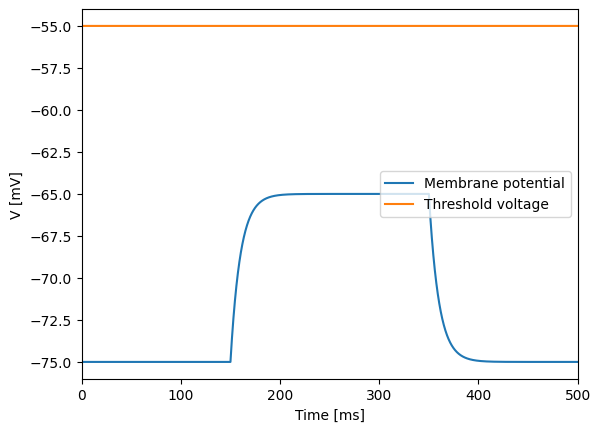

In [4]:
# Get parameters
pars = default_pars(T=500)

# Simulate LIF model
v, sp = run_LIF(pars, Iinj=100, stop=True)
# Visualize
t = np.arange(0,500,pars['dt'])
plt.plot(t, v, label='Membrane potential')  #plotting membrane voltage
plt.xlim([0, 500])
plt.xlabel('Time [ms]')
plt.ylabel('V [mV]')
plt.plot(t,pars['V_th']*np.ones(v.shape[0]), label='Threshold voltage')     # plotting the threshold voltage
plt.legend(loc="center right")
plt.rcParams['figure.figsize']=(8,5)
plt.show()


*Example output:*

<img alt='Solution hint' align='left' width=820.0 height=539.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W2D3_BiologicalNeuronModels/static/W2D3_Tutorial1_Solution_60a1e954_0.png>



---
# Response of an LIF model to different types of input currents



In the following section, we will learn how to inject direct current and white noise to study the response of an LIF neuron.

### Parameter exploration of Direct current (DC) input amplitude 
Please shows how the LIF neuron behavior changes for DC input (constant current) with different amplitudes.You may notice that the neuron generates a spike. But this is just a cosmetic spike only for illustration purposes. In an LIF neuron, we only need to keep track of times when the neuron hits the threshold so the postsynaptic neurons can be informed of the spike. 

How much DC is needed to reach the threshold (rheobase current)? How does the membrane time constant affect the frequency of the neuron?

*`10 Points`*

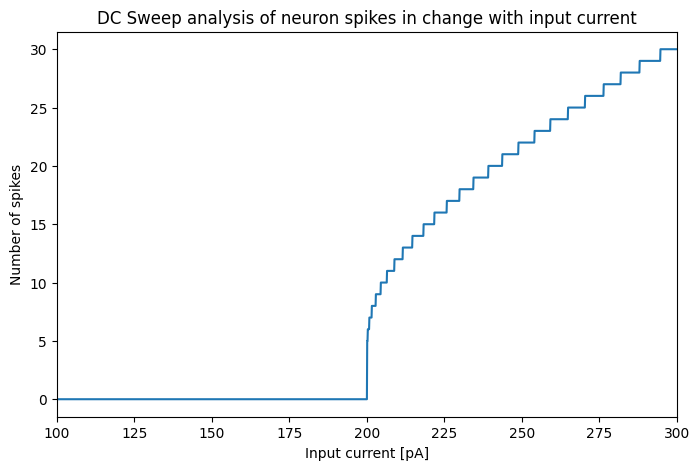

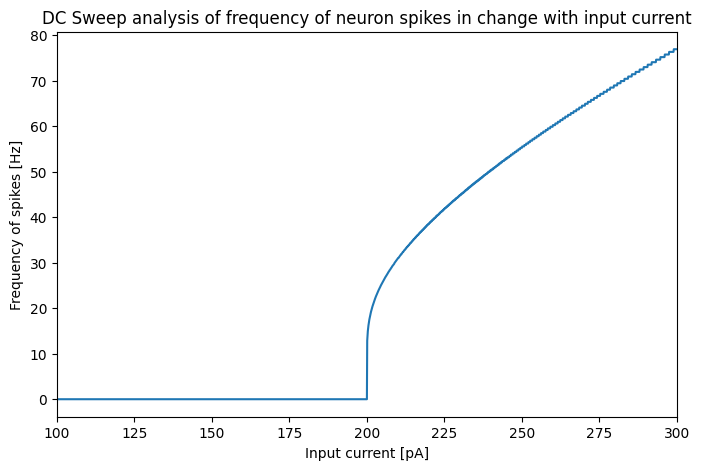

In [5]:
pars = default_pars()

Iin = np.arange(100,300,0.1)
sp_num = np.zeros(Iin.shape[0])
sp_freq = np.zeros(Iin.shape[0])

for i in range(Iin.size):

    v , sp = run_LIF(pars, Iinj=Iin[i])
    sp_num[i] = sp.shape[0]
    if(sp.shape[0] < 2):
        sp_freq[i] = 0
    else:
        sp_freq[i] = 1/(sp[1] - sp[0]) * 1000

plt.plot(Iin, sp_num)
plt.xlim([100, 300])
plt.xlabel('Input current [pA]')
plt.ylabel('Number of spikes')
plt.title('DC Sweep analysis of neuron spikes in change with input current')
plt.show()

plt.figure()
plt.plot(Iin, sp_freq)
plt.xlim([100, 300])
plt.xlabel('Input current [pA]')
plt.ylabel('Frequency of spikes [Hz]')
plt.title('DC Sweep analysis of frequency of neuron spikes in change with input current')
plt.show()

In [6]:
def find_rheobase_current(pars, init_I):

    """
        Having the input current as inout argument,
        This function returns the minimum input (i.e., $\mu$) needed to make a neuron spike
    """

    I = init_I
    finish = False
    while(not finish):
        v , sp = run_LIF(pars, Iinj=I)
        sp_num = sp.shape[0]
        I = I + 1
        if(sp_num > 0):
            finish = True

    return I-1

pars = default_pars()
print("The rheobase current equals to ", find_rheobase_current(pars,100), "pA.")

The rheobase current equals to  201 pA.


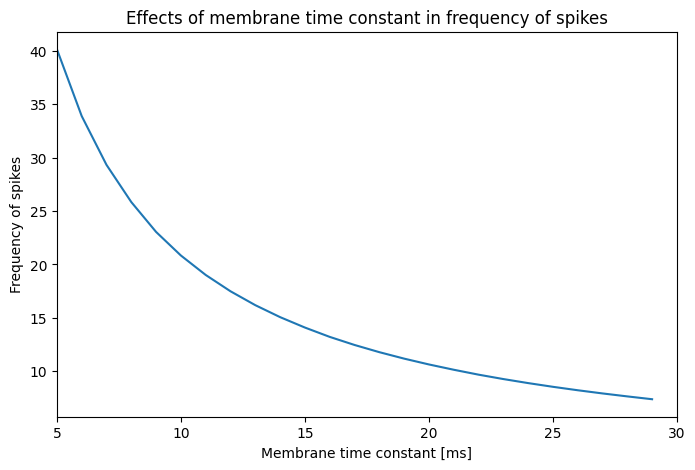

In [7]:
tau = np.arange(5,30,1)
sp_freq = np.zeros(tau.shape[0])

for i in range(tau.size):

    pars['tau_m'] = tau[i]
    v , sp = run_LIF(pars, Iinj=202)
    if(sp.shape[0] == 0):
        sp_freq[i] = 0
    elif(sp.shape[0] == 1):
        sp_freq[i] = 1/pars['T'] * 1000
    else:
        sp_freq[i] = 1/(sp[1] - sp[0]) * 1000

plt.plot(tau, sp_freq)
plt.xlim([5, 30])
plt.xlabel('Membrane time constant [ms]')
plt.ylabel('Frequency of spikes')
plt.title('Effects of membrane time constant in frequency of spikes')
plt.show()

## Gaussian white noise (GWN) current 


Given the noisy nature of neuronal activity _in vivo_, neurons usually receive complex, time-varying inputs.

To mimic this, we will now investigate the neuronal response when the LIF neuron receives Gaussian white noise $\xi(t)$ with mean 0 ($\mu = 0$) and some standard deviation $\sigma$.

Note that the GWN has zero mean, that is, it describes only the fluctuations of the input received by a neuron. We can thus modify our definition of GWN to have a nonzero mean value $\mu$ that equals the DC input, since this is the average input into the cell. The cell below defines the modified gaussian white noise currents with nonzero mean $\mu$.

### LIF neuron Explorer for noisy input


The mean of the Gaussian white noise (GWN) is the amplitude of DC. Indeed, when $\sigma = 0$, GWN is just a DC.

So the question arises how does $\sigma$ of the GWN affect the spiking behavior of the neuron. For instance, we may want to know
1.  how does the minimum input (i.e., $\mu$) needed to make a neuron spike change with increase in $\sigma$
2.  how does the spike regularity change with increase in $\sigma$

Please fill the my_GWN function to generate the noisy input current and then answer the question above: `my_GWN(pars, mu, sig, myseed=False)`.  Note that fixing the value of the random seed (e.g., `myseed=2020`) will allow you to obtain the same result every time you run this. We then use our `run_LIF` function to simulate the LIF model.

*`15 Points`*

In [8]:
def my_GWN(pars, mu, sig, myseed=False):
  """
  Function that generates Gaussian white noise input

  Args:
    pars       : parameter dictionary
    mu         : noise baseline (mean)
    sig        : noise amplitude (standard deviation)
    myseed     : random seed. int or boolean
                 the same seed will give the same
                 random number sequence

  Returns:
    I          : Gaussian white noise input
  """

  # Retrieve simulation parameters
  dt, range_t = pars['dt'], pars['range_t']
  Lt = range_t.size

  # Set random seed
  np.random.seed(myseed)

  # Generate GWN and convert units to sec.
  I_gwn = mu + sig*100 * np.random.randn(Lt)

  return I_gwn

help(my_GWN)


Help on function my_GWN in module __main__:

my_GWN(pars, mu, sig, myseed=False)
    Function that generates Gaussian white noise input
    
    Args:
      pars       : parameter dictionary
      mu         : noise baseline (mean)
      sig        : noise amplitude (standard deviation)
      myseed     : random seed. int or boolean
                   the same seed will give the same
                   random number sequence
    
    Returns:
      I          : Gaussian white noise input



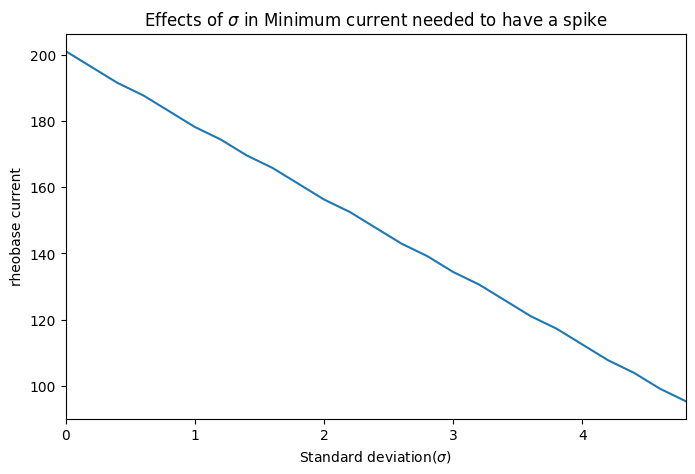

In [9]:
sig = np.arange(0,5,0.2)
myseed = 2020
min_current = np.zeros(sig.shape[0])
pars = default_pars()

for i in range(sig.size):
    Iinj = my_GWN(pars,90,sig[i],myseed)
    min_current[i] = np.mean(find_rheobase_current(pars,Iinj))

# Visualize
plt.plot(sig, min_current)
plt.xlim([sig[0], sig[-1]])
plt.xlabel('Standard deviation($\sigma$)')
plt.ylabel('rheobase current')
plt.title('Effects of $\sigma$ in Minimum current needed to have a spike')
plt.show()

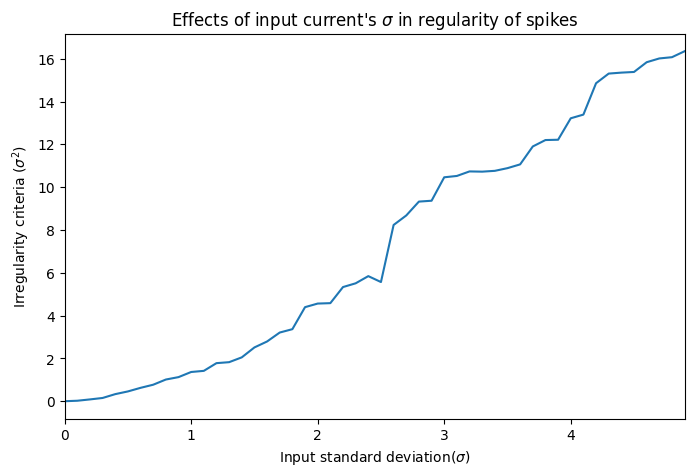

In [10]:
sig = np.arange(0,5,0.1)
mu = 250
myseed = 2020
irregularity = np.zeros(sig.shape[0])
pars = default_pars()

for i in range(sig.size):
    Iinj = my_GWN(pars,mu,sig[i],myseed)
    v , sp = run_LIF(pars, Iinj)
    irregularity[i] = np.var(np.diff(sp))

# Visualize
plt.plot(sig, irregularity)
plt.xlim([sig[0], sig[-1]])
plt.xlabel('Input standard deviation($\sigma$)')
plt.ylabel('Irregularity criteria ($\sigma^2$)')
plt.title('Effects of input current\'s $\sigma$ in regularity of spikes')
plt.show()

### Analyzing GWN Effects on Spiking
- As we increase the input average ($\mu$) or the input fluctuation ($\sigma$), the spike count changes. How much can we increase the spike count, and what might be the relationship between GWN mean/std or DC value and spike count? 

- We have seen above that when we inject DC, the neuron spikes in a regular manner (clock-like), and this regularity is reduced when GWN is injected. The question is, how irregular can we make the neurons spiking by changing the parameters of the GWN? 

We will see the answers to these questions in the next section but discuss first!

*`5 Points`*


### The interspike interval (ISI)
The ISI is the time between subsequent action potentials (also known as spikes) of a single or group of neuron. 
Please search a little bit about this concept and discuss it in your report. 
*`5 Points`*

---
# Firing rate and spike time irregularity


When we plot the output firing rate as a function of GWN mean or DC value, it is called the input-output transfer function of the neuron (so simply F-I curve).

Spike regularity can be quantified as the **coefficient of variation (CV) of the interspike interval (ISI)**:

\begin{equation}
\text{CV}_{\text{ISI}} = \frac{std(\text{ISI})}{mean(\text{ISI})}
\end{equation}

A Poisson train is an example of high irregularity, in which $\textbf{CV}_{\textbf{ISI}} \textbf{= 1}$. And for a clocklike (regular) process we have $\textbf{CV}_{\textbf{ISI}} \textbf{= 0}$ because of **std(ISI)=0**.

## F-I Explorer for different `sig_gwn`

How does the F-I curve of the LIF neuron change as we increase the $\sigma$ of the GWN? We can already expect that the F-I curve will be stochastic and the results will vary from one trial to another. But will there be any other change compared to the F-I curved measured using DC?

write a simple code and show how the F-I curve of a LIF neuron changes for different levels of fluctuation $\sigma$.

*`10 Points`*

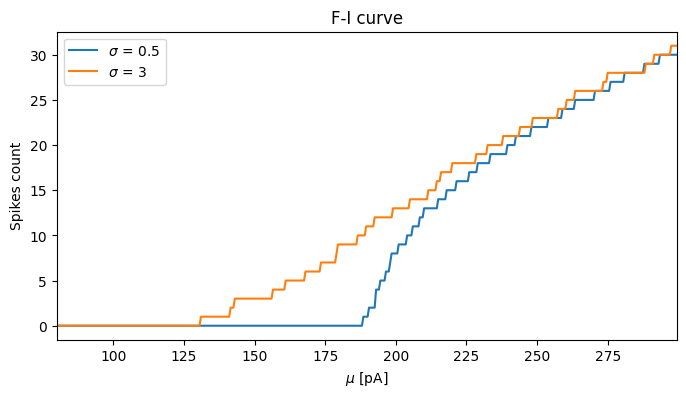

In [128]:
mu = np.arange(80,300,0.5)
sigma = [0.5, 3]
myseed = 2020
sp_freq_1 = np.zeros(mu.shape[0])
sp_freq_2 = np.zeros(mu.shape[0])
pars = default_pars()

for i in range(mu.size):
    Iinj_1 = my_GWN(pars,mu[i],sigma[0],myseed)
    v_1 , sp_1 = run_LIF(pars, Iinj_1)
    Iinj_2 = my_GWN(pars,mu[i],sigma[1],myseed)
    v_2 , sp_2 = run_LIF(pars, Iinj_2)

    sp_freq_1[i] = len(sp_1)
    sp_freq_2[i] = len(sp_2)

# Visualize
plt.plot(mu, sp_freq_1, label="$\sigma$ = " + str(sigma[0]))
plt.plot(mu, sp_freq_2, label="$\sigma$ = " + str(sigma[1]))
plt.xlim([mu[0], mu[-1]])
plt.xlabel('$\mu$ [pA]')
plt.ylabel('Spikes count')
plt.title('F-I curve')
plt.legend()
plt.show()

## Compute $CV_{ISI}$ values

The fluctuation can also change the irregularity of the spikes. Let's investigate the effect of $\mu=250$ with $\sigma=0.5$ vs $\sigma=3$. 

Fill in the code below to compute ISI, then plot the histogram of the ISI and compute the $CV_{ISI}$. Note that, you can use `np.diff` to calculate ISI.

*`10 Points`*

Text(0.5, 1.0, '$\\sigma_{GWN}$ = 3, CV = 0.22228875489118716')

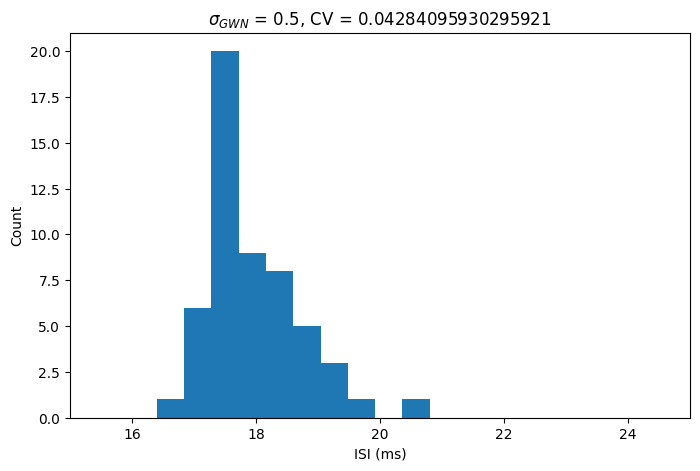

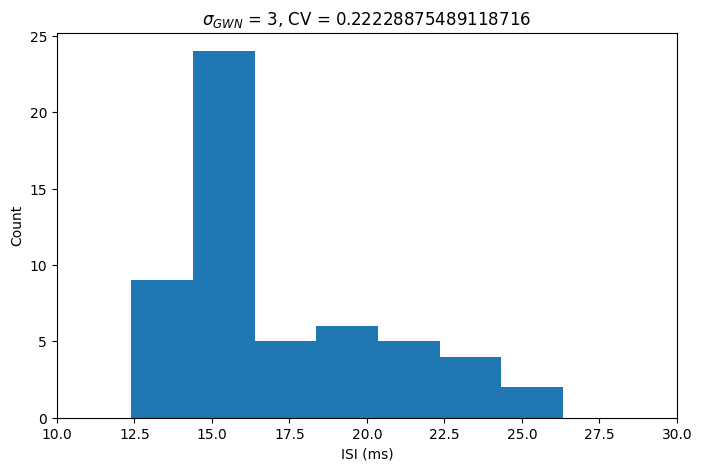

In [12]:
def isi_cv_LIF(spike_times):
  """
  Calculates the interspike intervals (isi) and
  the coefficient of variation (cv) for a given spike_train

  Args:
    spike_times : (n, ) vector with the spike times (ndarray)

  Returns:
    isi         : (n-1,) vector with the inter-spike intervals (ms)
    cv          : coefficient of variation of isi (float)

  """

  if len(spike_times) >= 2:
    # Compute isi
    isi = np.diff(spike_times)
    # Compute cv
    cv = np.std(isi) / np.mean(isi)
  else:
    isi = np.nan
    cv = np.nan

  return isi, cv


# Set parameters
pars = default_pars(T=1000.)
mu_gwn = 250
sig_gwn1 = 0.5
sig_gwn2 = 3

# Run LIF model for sigma = 0.5
I_GWN1 = my_GWN(pars, mu=mu_gwn, sig=sig_gwn1, myseed=2020)
_, sp1 = run_LIF(pars, Iinj=I_GWN1)

# Run LIF model for sigma = 3
I_GWN2 = my_GWN(pars, mu=mu_gwn, sig=sig_gwn2, myseed=2020)
_, sp2 = run_LIF(pars, Iinj=I_GWN2)

# Compute ISIs/CV
isi1, cv1 = isi_cv_LIF(sp1)
isi2, cv2 = isi_cv_LIF(sp2)

# Visualize
plt.hist(isi1)
plt.xlabel('ISI (ms)')
plt.ylabel('Count')
plt.xlim(15,25)
plt.title('$\sigma_{GWN}$ = '+ str(sig_gwn1) + ', CV = ' + str(cv1))
plt.figure()
plt.hist(isi2)
plt.xlabel('ISI (ms)')
plt.ylabel('Count')
plt.xlim(10,30)
plt.title('$\sigma_{GWN}$ = '+ str(sig_gwn2) + ', CV = ' + str(cv2))


*Example output:*

<img alt='Solution hint' align='left' width=1078.0 height=378.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W2D3_BiologicalNeuronModels/static/W2D3_Tutorial1_Solution_27d69c89_0.png>



## Spike irregularity explorer for different `sig_gwn`

How different levels of fluctuation $\sigma$ affect the CVs for different average injected currents ($\mu$)?

1. Does the standard deviation of the injected current affect the F-I curve in any qualitative manner?
2. Why does increasing the mean of GWN reduce the CV$_{\rm ISI}$?
3.  If you plot spike count (or rate) vs. CV$_{\rm ISI}$, should there be a relationship between the two? Try out yourself.

*`15 Points`*

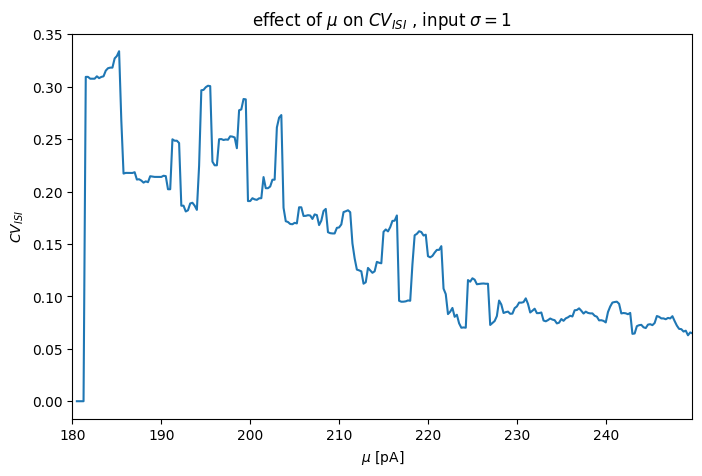

In [13]:
mu = np.arange(180,250,0.25)
sigma = 1
myseed = 2020
cv_isi = np.zeros(mu.shape[0])
pars = default_pars()

for i in range(mu.size):
    Iinj = my_GWN(pars,mu[i],sigma,myseed)
    v_1 , sp = run_LIF(pars, Iinj)
    _, cv = isi_cv_LIF(sp)
    cv_isi[i] = cv

# Visualize
plt.plot(mu, cv_isi)
plt.xlim([mu[0], mu[-1]])
plt.xlabel('$\mu$ [pA]')
plt.ylabel('$CV_{ISI}$')
plt.title('effect of $\mu$ on $CV_{ISI}$ , input $\sigma = 1$')
plt.show()


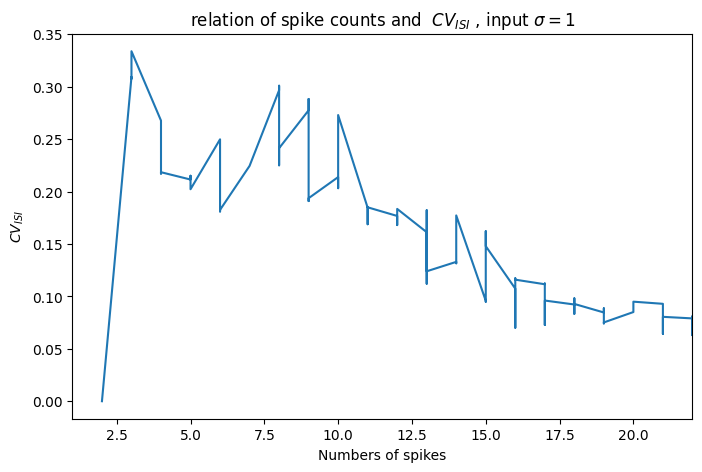

In [14]:
mu = np.arange(180,250,0.25)
sigma = 1
myseed = 2020
cv_isi = np.zeros(mu.shape[0])
spike_num = np.zeros(mu.shape[0])
pars = default_pars()

for i in range(mu.size):
    Iinj = my_GWN(pars,mu[i],sigma,myseed)
    v_1 , sp = run_LIF(pars, Iinj)
    _, cv = isi_cv_LIF(sp)
    cv_isi[i] = cv
    spike_num[i] = len(sp)

# Visualize
plt.plot(spike_num, cv_isi)
plt.xlim([spike_num[0], spike_num[-1]])
plt.ylabel('$CV_{ISI}$')
plt.xlabel('Numbers of spikes')
plt.title('relation of spike counts and  $CV_{ISI}$ , input $\sigma = $' + str(sigma))
plt.show()

---
## Ornstein-Uhlenbeck Process

When a neuron receives spiking input, the synaptic current is Shot Noise -- which is a kind of colored noise and the spectrum of the noise determined by the synaptic kernel time constant. That is, a neuron is driven by **colored noise** and not GWN.

We can model colored noise using the Ornstein-Uhlenbeck process - filtered white noise. 

We next study if the input current is temporally correlated and is modeled as an Ornstein-Uhlenbeck process $\eta(t)$, i.e., low-pass filtered GWN with a time constant $\tau_{\eta}$: 

\begin{equation}
\tau_\eta \frac{d}{dt}\eta(t) = \mu-\eta(t) + \sigma_\eta\sqrt{2\tau_\eta}\xi(t)
\end{equation}

**Hint:** An OU process as defined above has

\begin{equation}
\mathbb{E}[\eta(t)]=\mu
\end{equation}

and autocovariance 

\begin{equation}
[\eta(t)\eta(t+\tau)]=\sigma_\eta^2e^{-|t-\tau|/\tau_\eta}
\end{equation}

which can be used to check your code. 

In the following, we will check how a neuron responds to a noisy current that follows the statistics of an OU process. please fill the my_OU function and run your LIF model with OU process input current, then answer question below:

-  How does the OU type input change neuron responsiveness? 
-  What do you think will happen to the spike pattern and rate if you increased or decreased the time constant of the OU process?

*`15 Points`*

Help on function my_OU in module __main__:

my_OU(pars, mu, sig, myseed=False)
    Function that produces Ornstein-Uhlenbeck input
    
    Args:
      pars       : parameter dictionary
      sig        : noise amplitude
      myseed     : random seed. int or boolean
    
    Returns:
      I_ou       : Ornstein-Uhlenbeck input current

Average of I_ou = 200.3145104262211


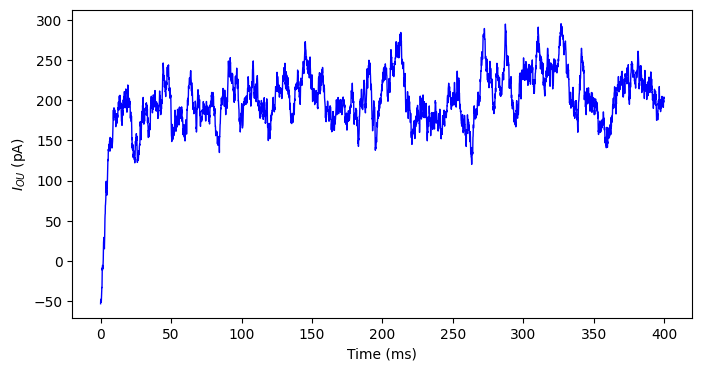

In [159]:
def my_OU(pars, mu, sig, myseed=False):
  """
  Function that produces Ornstein-Uhlenbeck input

  Args:
    pars       : parameter dictionary
    sig        : noise amplitude
    myseed     : random seed. int or boolean

  Returns:
    I_ou       : Ornstein-Uhlenbeck input current
  """

  # Retrieve simulation parameters
  dt, range_t = pars['dt'], pars['range_t']
  Lt = range_t.size
  tau_ou = pars['tau_ou']  # [ms]

  # set random seed
  if myseed:
    np.random.seed(myseed)
  else:
    np.random.seed()

  # Initialize
  noise = np.random.randn(Lt)
  I_ou = np.zeros(Lt)
  I_ou[0] = noise[0] * sig

  # generate OU
  for it in range(Lt-1):
    dI = (dt/tau_ou) * (mu-I_ou[it]) + np.sqrt(2*dt/tau_ou)*sig*noise[it+1]
    I_ou[it+1] = I_ou[it] + dI

  return I_ou


help(my_OU)
pars = default_pars()
pars['tau_ou'] = 5
I_ou = my_OU(pars, 200, 30, 2020)
print("Average of I_ou = " + str(np.mean(I_ou)))
plt.plot(pars['range_t'], I_ou, 'b', lw=1.0)
plt.xlabel('Time (ms)')
plt.ylabel(r'$I_{OU}$ (pA)')
plt.show()

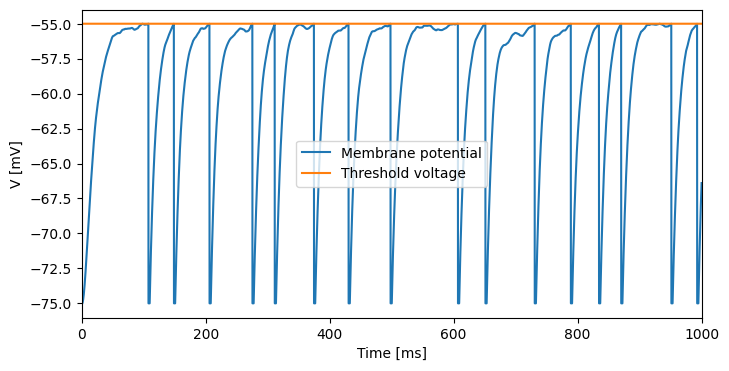

In [160]:
# Simulate LIF model
mu = 200
sig = 5
pars = default_pars(T=1000)
pars['tau_ou'] = 10
Iinj = my_OU(pars, mu, sig, 2020)
v, sp = run_LIF(pars, Iinj)
# Visualize
t = np.arange(0,pars['T'],pars['dt'])
plt.plot(t, v, label='Membrane potential')  #plotting membrane voltage
plt.xlim([0, pars['T']])
plt.xlabel('Time [ms]')
plt.ylabel('V [mV]')
plt.plot(t,pars['V_th']*np.ones(v.shape[0]), label='Threshold voltage')     # plotting the threshold voltage
plt.legend()
plt.rcParams['figure.figsize']=(8,4)
plt.show()

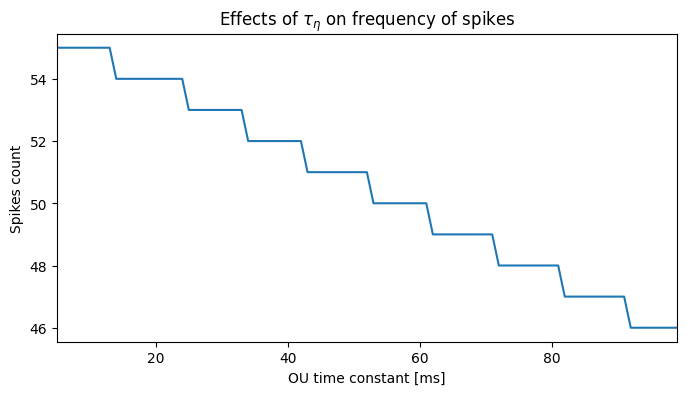

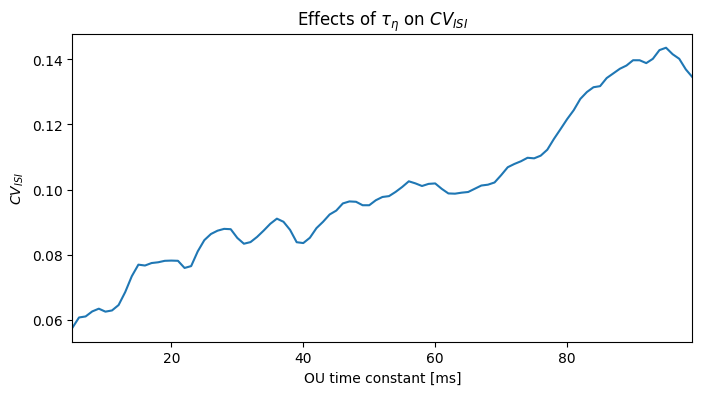

In [174]:
tau = np.arange(5,100,1)
sp_num = np.zeros(tau.shape[0])
cv_isi = np.zeros(tau.shape[0])

pars = default_pars(T=1000)
mu = 250
sig = 10

for i in range(tau.size):

    pars['tau_ou'] = tau[i]
    Iinj = my_OU(pars, mu, sig, 2020)
    v , sp = run_LIF(pars, Iinj)
    isi, cv_isi[i] = isi_cv_LIF(sp)
    sp_num[i] = len(sp)

plt.plot(tau, sp_num)
plt.xlim([tau[0], tau[-1]])
plt.xlabel('OU time constant [ms]')
plt.ylabel('Spikes count')
plt.title('Effects of $\\tau_\eta$ on frequency of spikes')
plt.show()

plt.figure()
plt.plot(tau, cv_isi)
plt.xlim([tau[0], tau[-1]])
plt.xlabel('OU time constant [ms]')
plt.ylabel('$CV_{ISI}$')
plt.title('Effects of $\\tau_\eta$ on $CV_{ISI}$')
plt.show()

---
## Extensions to Integrate-and-Fire models


LIF model is not the only abstraction of real neurons. If you want to learn about more realistic types of neuronal models, please search about "Generalized Integrate-and-Fire models" and discuss it in your report. 

*`5 Points`*

---
#The Hodgkin-Huxley model

The Hodgkin–Huxley model, or conductance-based model, is a mathematical model that describes how action potentials in neurons are initiated and propagated. It is a set of nonlinear differential equations that approximates the electrical characteristics of excitable cells such as neurons and muscle cells. It is a continuous-time dynamical system.

Alan Hodgkin and Andrew Huxley described the model in 1952 to explain the ionic mechanisms underlying the initiation and propagation of action potentials in the squid giant axon.They received the 1963 Nobel Prize in Physiology or Medicine for this work. [link text](https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model)

4 eqs of Hodgkin-Huxley model  
* $C_M\displaystyle \frac{dV}{dt}=-g_{Na}(V-V_{Na})-g_k(V-V_K)-g_l(V-V_l)+I$ ($V$: Membrane Potential)  
* $\displaystyle \frac{dh}{dt}=\alpha_h{(V)}(1-h)-\beta_h(V)h$ ($h$: Na Inactivation)  
* $\displaystyle \frac{dm}{dt}=\alpha_m{(V)}(1-m)-\beta_m(V)m$ ($m$: Na Activation)  
* $\displaystyle \frac{dn}{dt}=\alpha_n{(V)}(1-n)-\beta_n(V)n$ ($n$: K Activation)  

Please fill the code below and discuss the whole code step by step in your report. 

*`5 Points`*

In [2]:
import numpy as np
import math

In [3]:
def alphaM(V):
    return (2.5-0.1*(V+65)) / (np.exp(2.5-0.1*(V+65)) -1)

def betaM(V):
    return 4*np.exp(-(V+65)/18)

def alphaH(V):
    return 0.07*np.exp(-(V+65)/20)

def betaH(V):
    return 1/(np.exp(3.0-0.1*(V+65))+1)

def alphaN(V):
    return (0.1-0.01*(V+65)) / (np.exp(1-0.1*(V+65)) -1)

def betaN(V):
    return 0.125*np.exp(-(V+65)/80)

def HH(I0,T0):
    dt = 0.01
    T  = math.ceil(T0/dt)  # [ms]
    gNa0 = 120   # [mS/cm^2]
    ENa  = 115  # [mV]
    gK0  = 36   # [mS/cm^2]
    EK   = -12  # [mV]
    gL0  = 0.3  # [mS/cm^2]
    EL   = 10.6  # [mV]

    t = np.arange(0,T)*dt
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    V[0]=-70.0
    m[0]=0.05
    h[0]=0.54
    n[0]=0.34

    for i in range(0,T-1):

        V[i+1] = V[i] + dt * (-1*gNa0*m[i]**3*h[i]*(V[i]+65 - ENa) - gK0*n[i]**4*(V[i]+65 - EK) - gL0*(V[i]+65 - EL) + I0)
        m[i+1] = m[i] + dt * (alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i])
        h[i+1] = h[i] + dt * (alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i])
        n[i+1] = n[i] + dt * (alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i])
        
    return V,m,h,n,t

## At low input current (`I0`), examine the HH dynamics.

  To understand how the HH model works, we'll start by focusing on the
  case when `I0` is small. Let's fix the input current to zero,

In [4]:
I0 = 0

and let's simulate the model for 100 ms,

In [5]:
T0 = 100

We've now defined both inputs to the `HH` function, and can execute it, as follows,

In [6]:
[V,m,h,n,t]=HH(I0,T0)

Notice that the function returns five outputs, which we assign to the variables `V`, `m`, `h`, `n`, and `t`.


What are the dynamics of the voltage (variable `V`) resulting
from this simulation?<br>
HINT:  Plot `V` vs `t`.

What are the dynamics of the gating variables (`m`, `h`, `n`)
resulting from this simulation?<br>

What are the final values (after the 100 ms of simulation) of
`V`, `m`, `h`, and `n`?

*`15 Points`*

Answer the above question using (`I0=10`).
*`5 Points`*

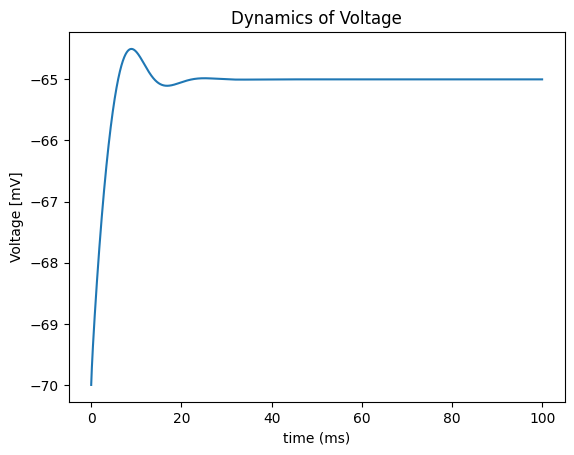

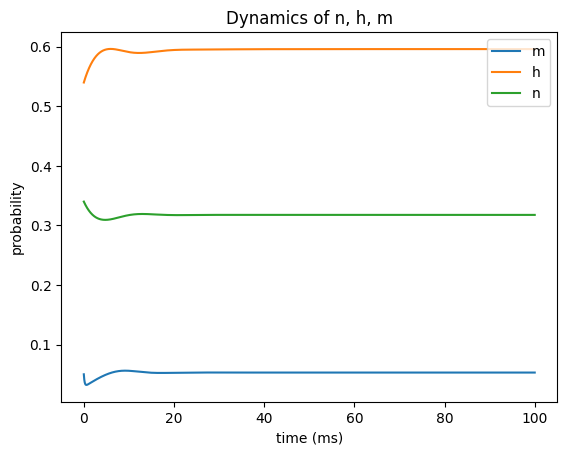

In [7]:
plt.plot(t,V)
plt.xlabel('time (ms)')
plt.ylabel('Voltage [mV]')
plt.title('Dynamics of Voltage')
plt.show()

plt.figure()
plt.plot(t,m, label="m")
plt.plot(t,h, label="h")
plt.plot(t,n, label="n")
plt.xlabel('time (ms)')
plt.ylabel('probability')
plt.title('Dynamics of n, h, m')
plt.legend()

plt.show()

Now, in the figure, you may use the pan/zoom tool to adjust the linked subplots.

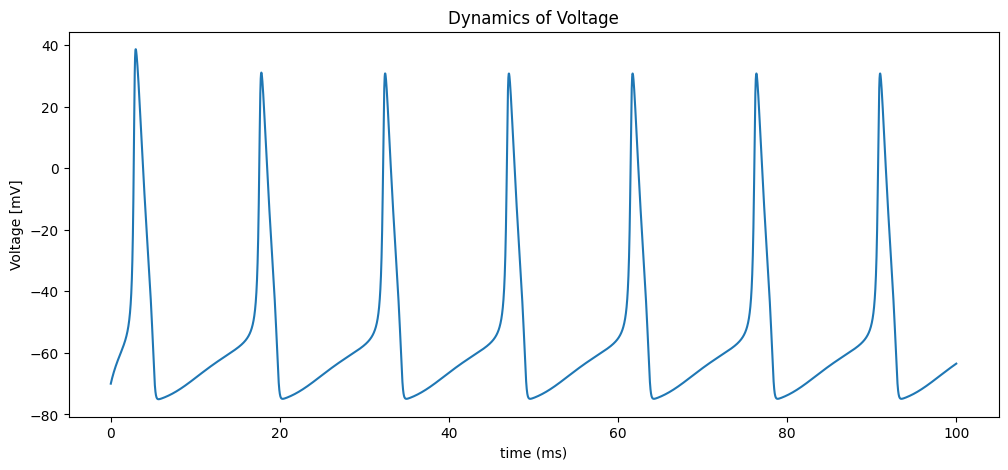

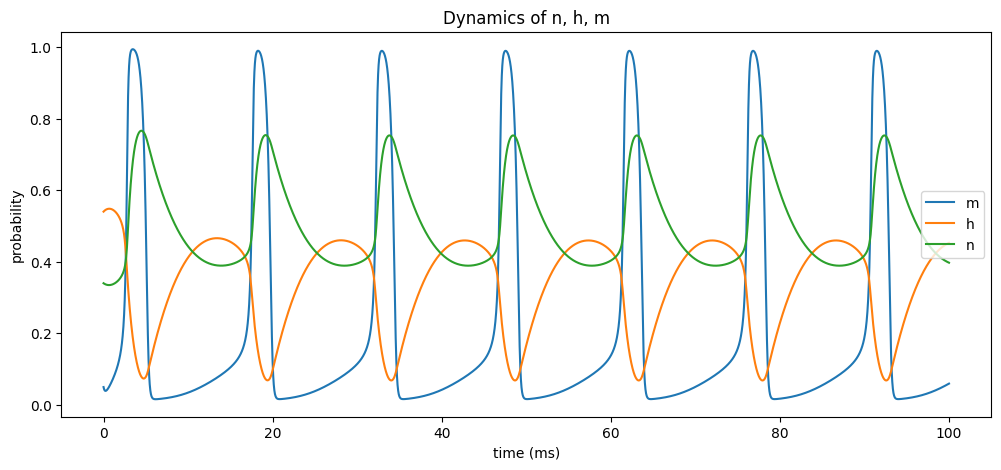

In [9]:
I0 = 10

[V2,m2,h2,n2,t2]=HH(I0,T0)

plt.plot(t2,V2)
plt.xlabel('time (ms)')
plt.ylabel('Voltage [mV]')
plt.title('Dynamics of Voltage')
plt.show()

plt.figure()
plt.plot(t2,m2, label="m")
plt.plot(t2,h2, label="h")
plt.plot(t2,n2, label="n")
plt.xlabel('time (ms)')
plt.ylabel('probability')
plt.title('Dynamics of n, h, m')
plt.legend(loc = 'center right')
plt.rcParams['figure.figsize']=(12,5)
plt.show()


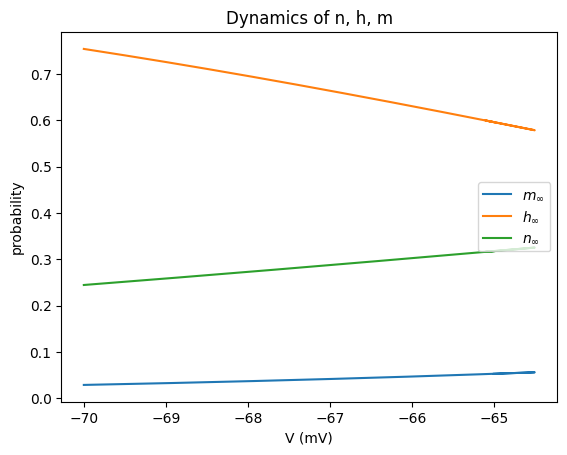

In [103]:
steady_n = alphaN(V)/(alphaN(V) + betaN(V))
steady_m = alphaM(V)/(alphaM(V) + betaM(V))
steady_h = alphaH(V)/(alphaH(V) + betaH(V))

plt.figure()
plt.plot(V,steady_m, label="$m_{\infty}$")
plt.plot(V,steady_h, label="$h_{\infty}$")
plt.plot(V,steady_n, label="$n_{\infty}$")
plt.xlabel('V (mV)')
plt.ylabel('probability')
plt.title('Dynamics of n, h, m')
plt.legend(loc = 'center right')
plt.show()

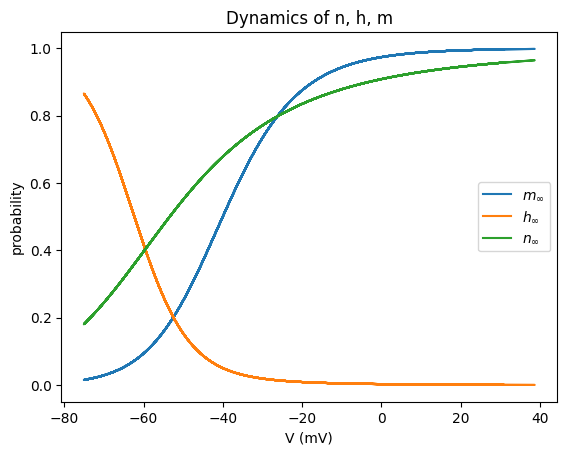

In [104]:
steady_n2 = alphaN(V2)/(alphaN(V2) + betaN(V2))
steady_m2 = alphaM(V2)/(alphaM(V2) + betaM(V2))
steady_h2 = alphaH(V2)/(alphaH(V2) + betaH(V2))

plt.figure()
plt.plot(V2,steady_m2, label="$m_{\infty}$")
plt.plot(V2,steady_h2, label="$h_{\infty}$")
plt.plot(V2,steady_n2, label="$n_{\infty}$")
plt.xlabel('V (mV)')
plt.ylabel('probability')
plt.title('Dynamics of n, h, m')
plt.legend(loc = 'center right')
plt.show()


##Bonus (+10 points):
At (`I0=10`), describe the dynamics of the conductances.

please visualize how the *conductances* evolve during a single spike (plot gNa, gK, gL through time)

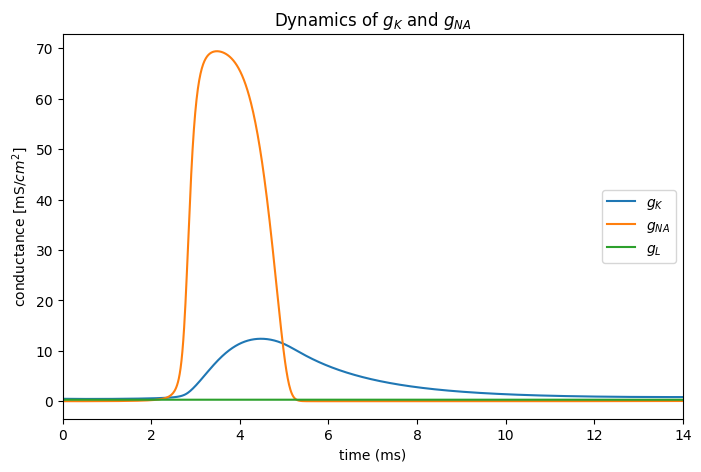

In [17]:
gNa0 = 120   # [mS/cm^2]
gK0  = 36   # [mS/cm^2]
gL0  = 0.3  # [mS/cm^2]

gK = gK0 * n2**4
gNa = gNa0 * m2**3 * h
gL = gL0 * np.ones(t2.shape[0])

plt.plot(t2,gK, label="$g_K$")
plt.plot(t2,gNa, label="$g_{NA}$")
plt.plot(t2,gL, label="$g_{L}$")
plt.xlabel('time (ms)')
plt.xlim([0, 14])
plt.ylabel('conductance [mS/$cm^2$]')
plt.title('Dynamics of $g_K$ and $g_{NA}$')
plt.legend(loc = 'center right')
plt.rcParams['figure.figsize']=(8,5)
plt.show()